# Data Preprocessing and Feature Engineering
You should build a machine learning pipeline with data preprocessing and feature engineering steps. In particular, you should do the following:
- Load the `adult` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Split the dataset into training and test sets using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).
- Conduct data preprocessing and feature engineering by
    - handling the implicit missing values of attributes, e.g., removing them using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html);
    - transforming features using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html), which requires encoding categorical attributes using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) and scaling features using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html);
    - reducing the dimensionality of the dataset if needed using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html);
    - and handling imbalanced classes if needed using [Imbalanced-Learn](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html).
- Train and test a support vector machine model using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).
- Evaluate the impact of the data preprocessing and feature engineering techniques on the effectiveness and efficiency of the model.
- Check the documentation to identify the most important hyperparameters, attributes, and methods. Use them in practice.

In [2]:
# Importing Libraries
import pandas
import sklearn.model_selection
import sklearn.compose
import sklearn.preprocessing
import sklearn.svm
import sklearn.metrics


### Business Problem Understanding

###Data Collection

In [3]:
#Load Data Use Pandas
df = pandas.read_csv('https://raw.githubusercontent.com/m-mahdavi/teaching/refs/heads/main/datasets/adult.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
# Separation of train n test  do this in the beginning
df_train, df_test =  sklearn.model_selection.train_test_split(df)
print("df size :", df.size)
print("df_train size :", df_train.shape)
print("df_test size :", df_test.shape)

df size : 488415
df_train size : (24420, 15)
df_test size : (8141, 15)


### Data Exploration

In [5]:
df_train["workclass"].unique()


array([' Federal-gov', ' ?', ' Private', ' Self-emp-not-inc',
       ' Local-gov', ' Self-emp-inc', ' State-gov', ' Never-worked',
       ' Without-pay'], dtype=object)

In [6]:
df_train.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education-num,int64
marital-status,object
occupation,object
relationship,object
race,object
sex,object


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'education-num'}>,
        <Axes: title={'center': 'capital-gain'}>],
       [<Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'hours-per-week'}>]], dtype=object)

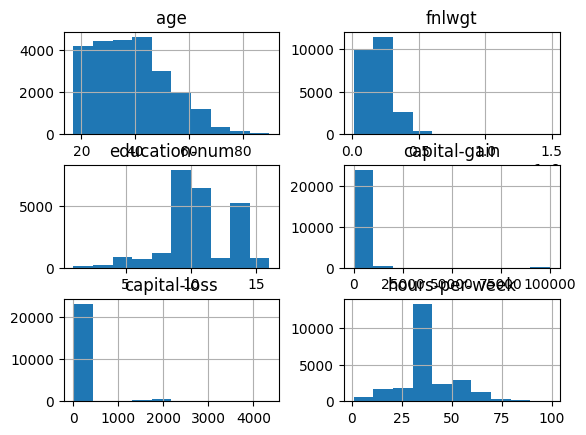

In [7]:
df_train.hist()

<Axes: xlabel='target'>

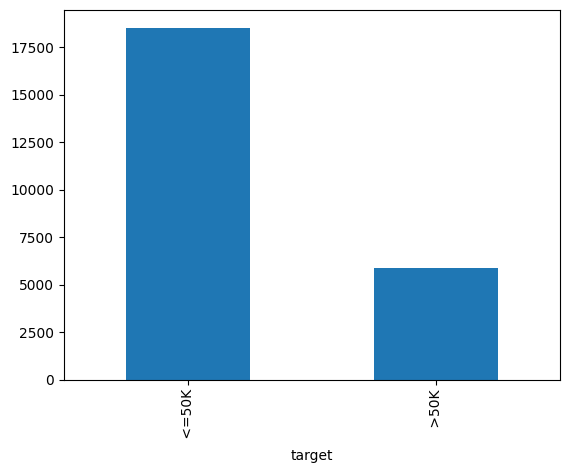

In [8]:
df_train["target"].value_counts().plot(kind="bar")

### Data Preprocessing

In [9]:
#converting all question mark values to defined value
df_train = df_train.replace(' ?' , pandas.NaT)
df_test = df_test.replace (' ?' , pandas.NaT)
df_train = df_train.dropna()
df_test = df_test.dropna()
print("df_train size :", df_train.shape)
print("df_test size :", df_test.shape)


df_train size : (22604, 15)
df_test size : (7558, 15)


In [10]:

x_train = df_train.drop("target", axis=1)
y_train = df_train["target"]
x_test = df_test.drop("target", axis=1)
y_test = df_test["target"]

print("x_train size :", x_train.shape)
print("x_test size :", x_test.shape)
print("y_train size :", y_train.shape)
print("y_test size :", y_test.shape)

x_train size : (22604, 14)
x_test size : (7558, 14)
y_train size : (22604,)
y_test size : (7558,)


### Feature Engineering

In [11]:
categorical_attributes = x_train.select_dtypes(include=["object"]).columns
numerical_attributes = x_train.select_dtypes(include=["int64"]).columns

ct = sklearn.compose.ColumnTransformer(
    [

    ("encoding", sklearn.preprocessing.OneHotEncoder(handle_unknown='ignore'), categorical_attributes),
    ("scaling", sklearn.preprocessing.StandardScaler(), numerical_attributes)
])
ct.fit(x_train)
x_train_transformed = ct.transform(x_train)
x_test_transformed = ct.transform(x_test)
print("df_train size :", df_train.shape)
print("df_test size :", df_test.shape)


df_train size : (22604, 15)
df_test size : (7558, 15)


### Model Training

In [12]:
model = sklearn.svm.SVC()
model.fit(x_train_transformed, y_train)

SVC()

### Model Evaluation

In [13]:
y_predicted= model.predict(x_test)
accuracy = sklearn.metrics.accuracy_score(y_test, y_predicted)
accuracy


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


ValueError: could not convert string to float: ' Private'